In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
ds = xr.open_dataset('./alaska_data/EOF/temp_interp.nc')
temp = ds.temp.values
ds.close()
temp = temp[:,:,:].mean(axis=0)
ds = xr.open_dataset('./alaska_data/EOF/prcp_interp.nc')
prcp = ds.prcp.values
ds.close()
prcp = prcp[:,:,:].mean(axis=0)
ds = xr.open_dataset('./alaska_data/EOF/vpd_interp.nc')
vpd = ds.vpd.values
ds.close()
vpd = vpd[:,:,:].mean(axis=0)
ds = xr.open_dataset('./alaska_data/EOF/nir_interp.nc')
nir = ds.nir.values
ds.close()
nir = nir[:,:,:].mean(axis=0)

ds = xr.open_dataset('./alaska_data/EOF/temp_interp.nc')
lat = ds.lat.values
lon = ds.lon.values
ds.close()

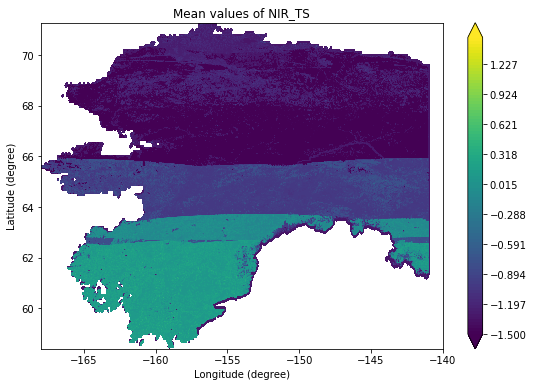

In [10]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,nir,levels=np.linspace(-1.5,1.5,100), extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Mean values of NIR_TS')
plt.savefig('./plot/nir_mean.png')

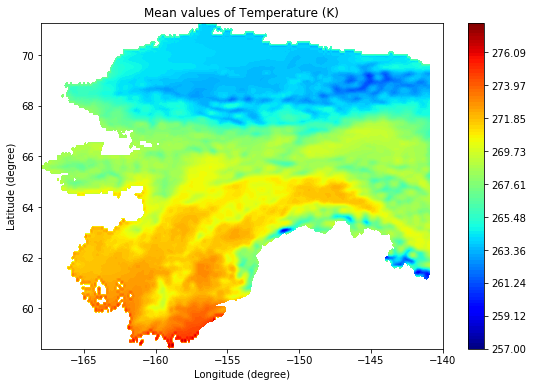

In [11]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,temp, cmap=plt.cm.jet,levels=np.linspace(257,278,100))
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Mean values of Temperature (K)')
plt.savefig('./plot/temp_mean.png')

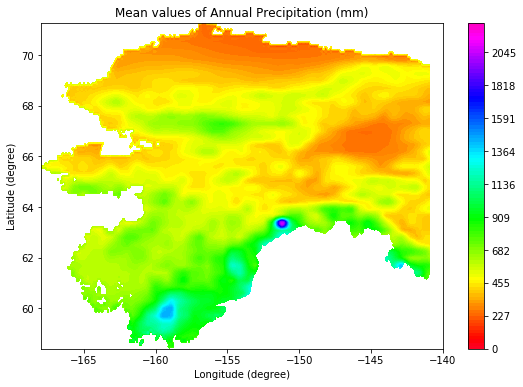

In [12]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,12000*prcp, cmap=plt.cm.gist_rainbow,levels=np.linspace(0,2250,100))
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Mean values of Annual Precipitation (mm)')
plt.savefig('./plot/prcp_mean.png')

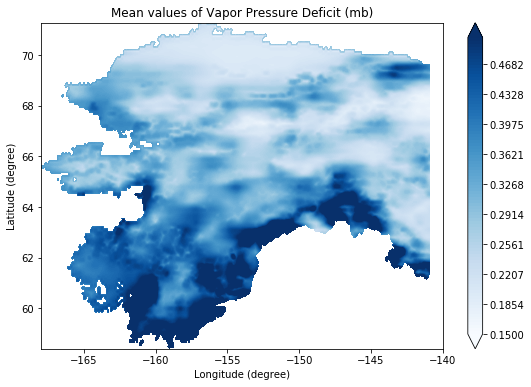

In [13]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,vpd, cmap=plt.cm.Blues,levels=np.linspace(.15,.5,100), extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Mean values of Vapor Pressure Deficit (mb)')
plt.savefig('./plot/vpd_mean.png')

In [5]:
ds = xr.open_dataset('./alaska_data/EOF/temp_interp.nc')
temp = ds.temp.values
ds.close()
temp_std = np.nanstd(temp[:,:,:],axis=0)
ds = xr.open_dataset('./alaska_data/EOF/prcp_interp.nc')
prcp = ds.prcp.values
ds.close()
prcp_std = np.nanstd(prcp[:,:,:],axis=0)
ds = xr.open_dataset('./alaska_data/EOF/vpd_interp.nc')
vpd = ds.vpd.values
ds.close()
vpd_std = np.nanstd(vpd[:,:,:],axis=0)
ds = xr.open_dataset('./alaska_data/EOF/nir_interp.nc')
nir = ds.nir.values
ds.close()
nir_std = np.nanstd(nir[:,:,:],axis=0)
ds = xr.open_dataset('./alaska_data/EOF/temp_interp.nc')
lat = ds.lat.values
lon = ds.lon.values
ds.close()

In [16]:
t = 156
x = 1291
y = 2801
df = pd.DataFrame(np.array([lat.reshape(x*y), lon.reshape(x*y), temp_std.reshape(x*y), prcp_std.reshape(x*y), 
                            vpd_std.reshape(x*y), nir_std.reshape(x*y)]).T,
             columns=['lat', 'lon', 'temp_std','prcp_std', 'vpd_std', 'nir_std'])
df.to_csv('./alaska_data/EOF/std.csv',index=False)

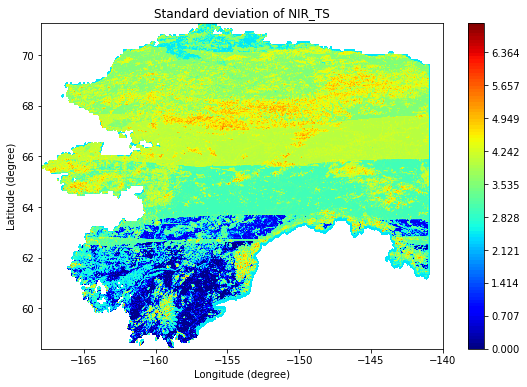

In [6]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,nir_std, cmap=plt.cm.jet,levels=np.linspace(0,7,100))
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Standard deviation of NIR_TS')
plt.savefig('./plot/nir_std.png')

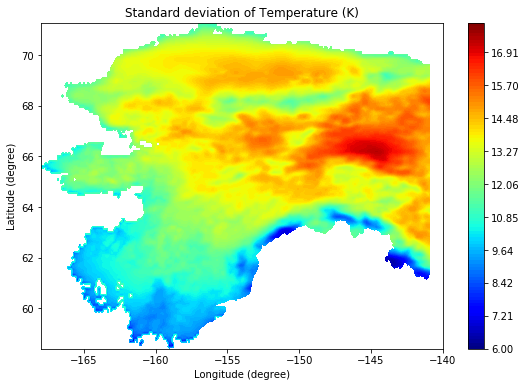

In [10]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,temp_std, cmap=plt.cm.jet,levels=np.linspace(6,18,100))
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Standard deviation of Temperature (K)')
plt.savefig('./plot/temp_std.png')

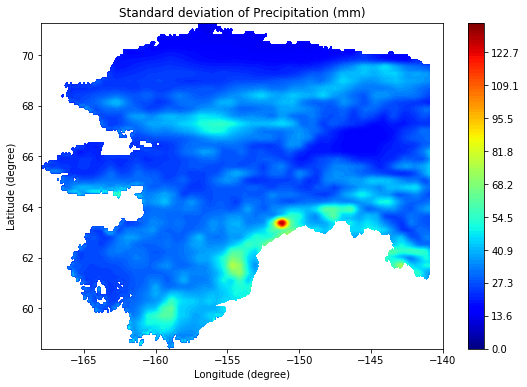

In [13]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,1000*prcp_std, cmap=plt.cm.jet,levels=np.linspace(0,135,100))
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Standard deviation of Precipitation (mm)')
plt.savefig('./plot/prcp_std.png')

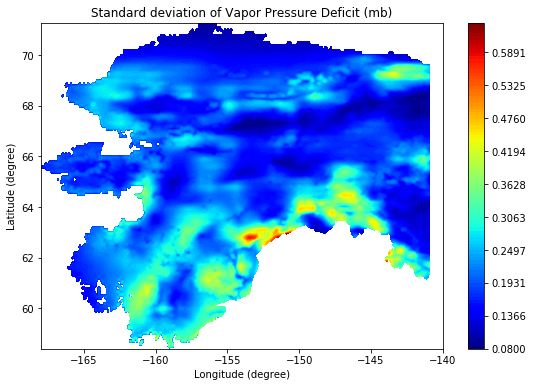

In [15]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,vpd_std, cmap=plt.cm.jet,levels=np.linspace(0.08,.64,100))
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Standard deviation of Vapor Pressure Deficit (mb)')
plt.savefig('./plot/vpd_std.png')

In [4]:
ds = xr.open_dataset('./alaska_data/EOF/olsdata.nc')
temp = ds.temp.values
prcp = ds.prcp.values
vpd = ds.vpd.values
lat = ds.lat.values
lon = ds.lon.values
ds.close()
ds = xr.open_dataset('./alaska_data/EOF/NIRPeak.nc')
nir = ds.Peak.values
ds.close()
ds = xr.open_dataset('./alaska_data/EOF/mask.nc')
mm = ds.mask.values
ds.close()
nir = np.where(mm, np.nan, nir[:,::-1].T)

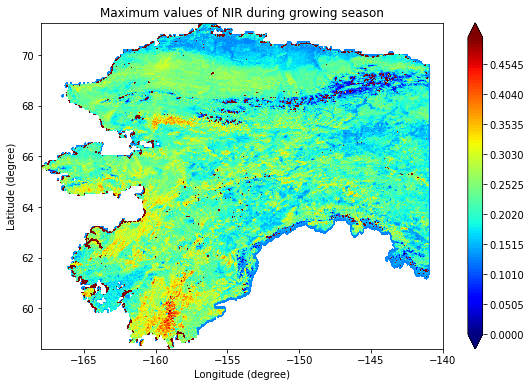

In [18]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,nir,cmap=plt.cm.jet,levels=np.linspace(0,.5,100), extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Maximum values of NIR during growing season')
plt.savefig('./plot/nir.png')

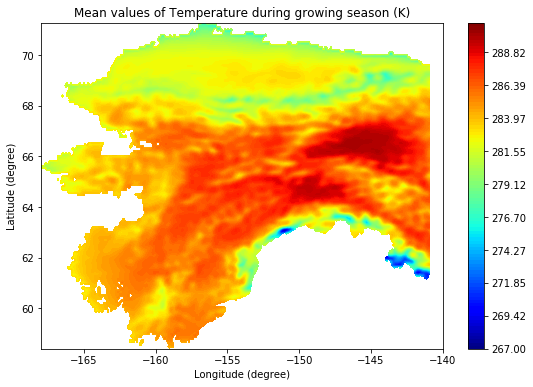

In [11]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,temp, cmap=plt.cm.jet,levels=np.linspace(267,291,100))
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Mean values of Temperature during growing season (K)')
plt.savefig('./plot/temp.png')

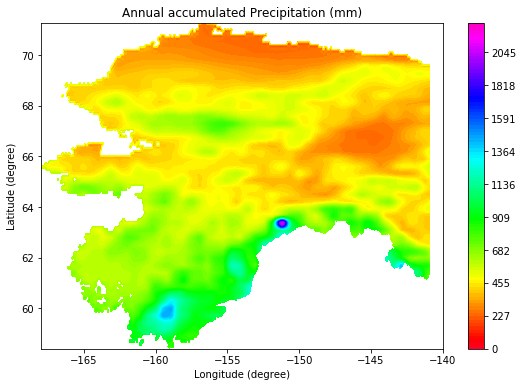

In [14]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,prcp, cmap=plt.cm.gist_rainbow,levels=np.linspace(0,2250,100))
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Annual accumulated Precipitation (mm)')
plt.savefig('./plot/prcp.png')

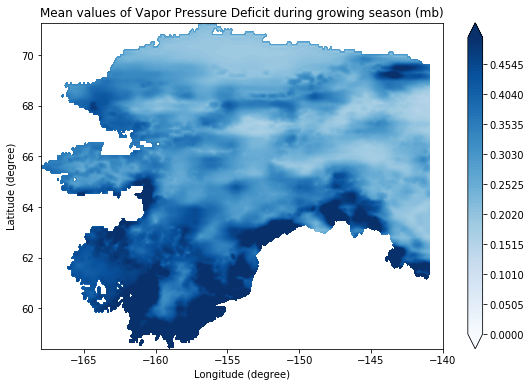

In [16]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,vpd, cmap=plt.cm.Blues,levels=np.linspace(0,.5,100), extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('Mean values of Vapor Pressure Deficit during growing season (mb)')
plt.savefig('./plot/vpd.png')